In [1]:
import os
import pandas as pd
import re

In [2]:
df = pd.read_csv("alldata.csv")

/tmp/ipykernel_12410/597102364.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("alldata.csv")


In [3]:
df

dead_year_be  dead_year_ad  agedouble   sex nationality_id tumbol  \
0               2554          2011        NaN  หญิง            NaN    NaN   
1               2554          2011        NaN  หญิง            NaN    NaN   
2               2554          2011        NaN  หญิง            NaN    NaN   
3               2554          2011        NaN  หญิง            NaN    NaN   
4               2554          2011       30.0   ชาย           99.0    NaN   
...              ...           ...        ...   ...            ...    ...   
245474          2562          2019       46.0   ชาย           99.0    NaN   
245475          2562          2019       60.0   ชาย           99.0    NaN   
245476          2562          2019       63.0   ชาย           99.0    NaN   
245477          2562          2019       66.0   ชาย           99.0    NaN   
245478          2562          2019       14.0   ชาย           99.0    NaN   

       district province  risk_helmet  dead_date_final             date_rec  \
0           NaN       ec          NaN              NaN  2554-04-08 00:00:00   
1           NaN       ec          NaN              NaN  2554-03-14 00:00:00   
2           NaN       ec          NaN              NaN  2554-03-14 00:00:00   
3           NaN       ec          NaN              NaN  2554-03-14 00:00:00   
4           NaN       ec          NaN              NaN  2554-07-29 00:00:00   
...         ...      ...          ...              ...                  ...   
245474      NaN      NaN          NaN              NaN  2562-07-05 00:00:00   
245475      NaN      NaN          NaN              NaN  2562-02-25 00:00:00   
245476      NaN      NaN          NaN              NaN  2562-09-03 00:00:00   
245477      NaN      NaN          NaN              NaN  2562-09-30 00:00:00   
245478      NaN      NaN          NaN              NaN  2562-04-18 00:00:00   

             time_recdouble        acc_sub_dist      acc_dist   dead_province  \
0       2554-04-08 00:00:00                1.75       ลาดสวาย         ลำลูกกา   
1       2554-03-14 00:00:00  1.9583333333333335       แม่สรวย         แม่สรวย   
2       2554-03-14 00:00:00  1.9583333333333335       แม่สรวย         แม่สรวย   
3       2554-03-14 00:00:00  1.9583333333333335       แม่สรวย         แม่สรวย   
4       2554-07-29 00:00:00  1.0069444444444444  นครสวรรค์ออก  เมืองนครสวรรค์   
...                     ...                 ...           ...             ...   
245474                  NaN                 NaN           NaN             NaN   
245475                  NaN                 NaN           NaN             NaN   
245476                  NaN                 NaN           NaN             NaN   
245477                  NaN                 NaN           NaN             NaN   
245478                  NaN                 NaN           NaN             NaN   

       acc_latlong    acclong      ncause vehicle_merge_final  
0         ปทุมธานี  13.934314  100.688985                 NaN  
1         เชียงราย        NaN         NaN                 NaN  
2         เชียงราย        NaN         NaN                 NaN  
3         เชียงราย        NaN         NaN                 NaN  
4        นครสวรรค์        NaN         NaN                V289  
...            ...        ...         ...                 ...  
245474       ลำปาง        NaN         NaN                V892  
245475       ลำปาง        NaN         NaN                V892  
245476       ลำปาง        NaN         NaN                V892  
245477   อุตรดิตถ์        NaN         NaN                V892  
245478   อุตรดิตถ์        NaN         NaN                V892  

[245479 rows x 19 columns]

In [4]:
df.columns

Index(['dead_year_be', 'dead_year_ad', 'agedouble', 'sex', 'nationality_id',
       'tumbol', 'district', 'province', 'risk_helmet', 'dead_date_final',
       'date_rec', 'time_recdouble', 'acc_sub_dist', 'acc_dist',
       'dead_province', 'acc_latlong', 'acclong', 'ncause',
       'vehicle_merge_final'],
      dtype='object')

In [5]:
df.head()

dead_year_be  dead_year_ad  agedouble   sex nationality_id tumbol district  \
0          2554          2011        NaN  หญิง            NaN    NaN      NaN   
1          2554          2011        NaN  หญิง            NaN    NaN      NaN   
2          2554          2011        NaN  หญิง            NaN    NaN      NaN   
3          2554          2011        NaN  หญิง            NaN    NaN      NaN   
4          2554          2011       30.0   ชาย           99.0    NaN      NaN   

  province  risk_helmet  dead_date_final             date_rec  \
0       ec          NaN              NaN  2554-04-08 00:00:00   
1       ec          NaN              NaN  2554-03-14 00:00:00   
2       ec          NaN              NaN  2554-03-14 00:00:00   
3       ec          NaN              NaN  2554-03-14 00:00:00   
4       ec          NaN              NaN  2554-07-29 00:00:00   

        time_recdouble        acc_sub_dist      acc_dist   dead_province  \
0  2554-04-08 00:00:00                1.75       ลาดสวาย         ลำลูกกา   
1  2554-03-14 00:00:00  1.9583333333333335       แม่สรวย         แม่สรวย   
2  2554-03-14 00:00:00  1.9583333333333335       แม่สรวย         แม่สรวย   
3  2554-03-14 00:00:00  1.9583333333333335       แม่สรวย         แม่สรวย   
4  2554-07-29 00:00:00  1.0069444444444444  นครสวรรค์ออก  เมืองนครสวรรค์   

  acc_latlong    acclong      ncause vehicle_merge_final  
0    ปทุมธานี  13.934314  100.688985                 NaN  
1    เชียงราย        NaN         NaN                 NaN  
2    เชียงราย        NaN         NaN                 NaN  
3    เชียงราย        NaN         NaN                 NaN  
4   นครสวรรค์        NaN         NaN                V289

In [6]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245479 entries, 0 to 245478
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dead_year_be         245479 non-null  int64  
 1   dead_year_ad         245479 non-null  int64  
 2   agedouble            215624 non-null  float64
 3   sex                  245479 non-null  object 
 4   nationality_id       134577 non-null  object 
 5   tumbol               34258 non-null   object 
 6   district             86511 non-null   object 
 7   province             86672 non-null   object 
 8   risk_helmet          4390 non-null    float64
 9   dead_date_final      2066 non-null    float64
 10  date_rec             245479 non-null  object 
 11  time_recdouble       106950 non-null  object 
 12  acc_sub_dist         106950 non-null  object 
 13  acc_dist             113280 non-null  object 
 14  dead_province        113748 non-null  object 
 15  acc_latlong      

# Data Profiling

In [7]:
len(df)

245479

In [8]:
from sys import getsizeof

In [9]:
getsizeof(df)

192380544

In [10]:
df.describe()

dead_year_be   dead_year_ad      agedouble  risk_helmet  \
count  245479.000000  245479.000000  215624.000000  4390.000000   
mean     2559.374183    2016.633439      40.015332     1.794989   
std         3.492256       3.512739      19.891668     0.513542   
min      2554.000000    2011.000000     -22.000000     1.000000   
25%      2556.000000    2014.000000      23.000000     1.000000   
50%      2559.000000    2017.000000      38.000000     2.000000   
75%      2562.000000    2020.000000      55.000000     2.000000   
max      2566.000000    2023.000000     154.000000     3.000000   

       dead_date_final        acclong         ncause  
count      2066.000000  115142.000000  115141.000000  
mean          2.264763      14.491634     100.972028  
std           0.519906       3.053319       4.382205  
min           1.000000     -74.389096     -92.511648  
25%           2.000000      13.605365      99.986291  
50%           2.000000      14.670285     100.684981  
75%           3.000000      16.442737     102.140575  
max           3.000000      23.822144     105.599818

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245479 entries, 0 to 245478
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dead_year_be         245479 non-null  int64  
 1   dead_year_ad         245479 non-null  int64  
 2   agedouble            215624 non-null  float64
 3   sex                  245479 non-null  object 
 4   nationality_id       134577 non-null  object 
 5   tumbol               34258 non-null   object 
 6   district             86511 non-null   object 
 7   province             86672 non-null   object 
 8   risk_helmet          4390 non-null    float64
 9   dead_date_final      2066 non-null    float64
 10  date_rec             245479 non-null  object 
 11  time_recdouble       106950 non-null  object 
 12  acc_sub_dist         106950 non-null  object 
 13  acc_dist             113280 non-null  object 
 14  dead_province        113748 non-null  object 
 15  acc_latlong      

In [12]:
import matplotlib.pyplot as plt

=========dead_year_be================


dead_year_be
2554    21996
2559    21745
2560    21607
2555    21603
2556    21221
2557    20790
2558    19960
2561    19931
2562    19904
2563    17831
2565    17379
2564    16957
2566     4555
Name: count, dtype: int64

=========dead_year_be Null============


dead_year_be
False    245479
Name: count, dtype: int64

Axes(0.125,0.11;0.775x0.77)


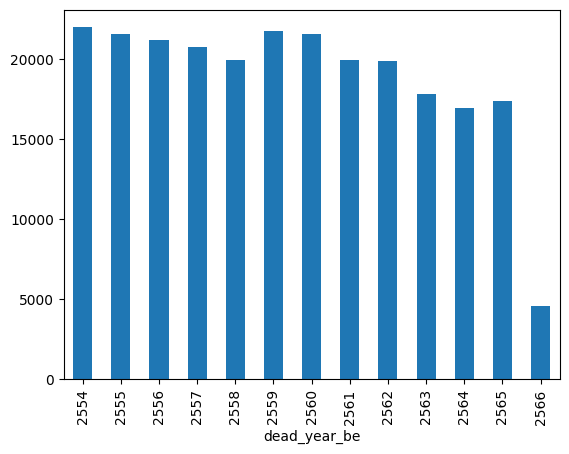

=========dead_year_ad================


dead_year_ad
2012    21857
2016    21669
2017    21592
2013    21158
2014    21035
2018    20419
2019    20015
2015    19733
2020    17744
2021    17573
2022    17347
2011    16213
2023     9124
Name: count, dtype: int64

=========dead_year_ad Null============


dead_year_ad
False    245479
Name: count, dtype: int64

Axes(0.125,0.11;0.775x0.77)


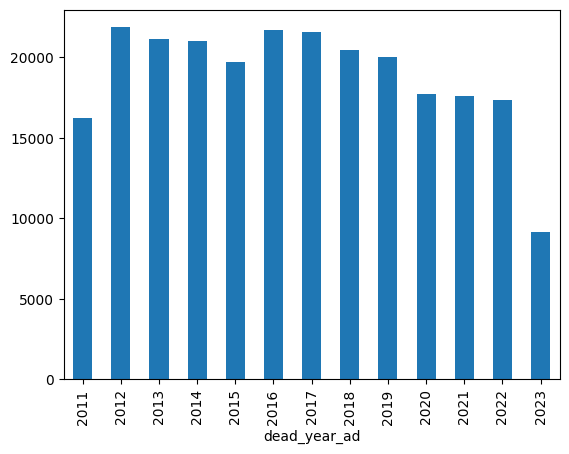

=========agedouble================


agedouble
19.0     5227
18.0     5071
17.0     5063
20.0     4984
16.0     4752
         ... 
154.0       1
118.0       1
110.0       1
100.0       1
137.0       1
Name: count, Length: 119, dtype: int64

=========agedouble Null============


agedouble
False    215624
True      29855
Name: count, dtype: int64

Axes(0.125,0.11;0.775x0.77)


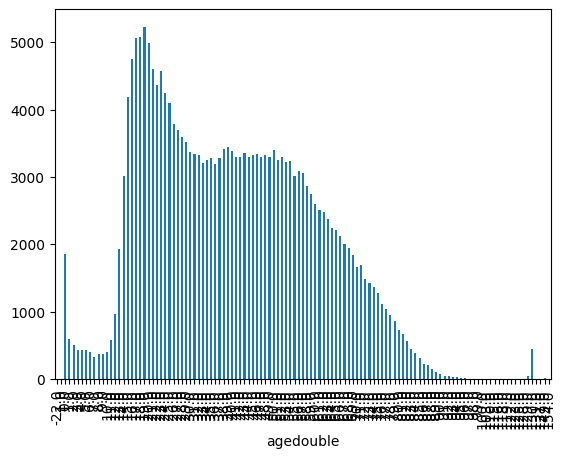

=========sex================


sex
ชาย        187666
หญิง        51248
ไม่ระบุ      6565
Name: count, dtype: int64

=========sex Null============


sex
False    245479
Name: count, dtype: int64

Axes(0.125,0.11;0.775x0.77)


/home/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3594 (\N{THAI CHARACTER CHO CHANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3618 (\N{THAI CHARACTER YO YAK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3627 (\N{THAI CHARACTER HO HIP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3597 (\N{THAI CHARACTER YO YING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


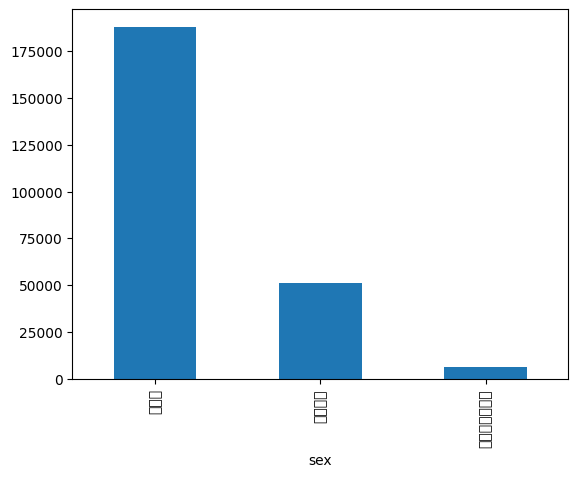

=========nationality_id================


nationality_id
99.0              117306
Thai                7946
99.0                5074
99                  3781
Burmese              179
                   ...  
Bermudan               1
Irish Irishman         1
Filipino               1
Kazakhstani            1
44.0                   1
Name: count, Length: 77, dtype: int64

=========nationality_id Null============


nationality_id
False    134577
True     110902
Name: count, dtype: int64

TypeError: '<' not supported between instances of 'str' and 'float'

In [13]:
for i in df.columns[:]:
    print("========="+i+"================")
    display(df[i].value_counts())
    print("========="+i+" Null============")
    display(df[i].isnull().value_counts())
    print(df[i].value_counts().sort_index().plot.bar())
    plt.show()

# Cleansing

In [14]:
for i in df.columns:
    #print(i)
    r = df[i].isnull().value_counts()
    #print(r)
    if len(r) == 2:
        print(i)

agedouble
nationality_id
tumbol
district
province
risk_helmet
dead_date_final
time_recdouble
acc_sub_dist
acc_dist
dead_province
acclong
ncause
vehicle_merge_final


Mean= 40.01533224501911
Median= 38.0
Mode= 0    19.0
Name: agedouble, dtype: float64
count    215624.000000
mean         40.015332
std          19.891668
min         -22.000000
25%          23.000000
50%          38.000000
75%          55.000000
max         154.000000
Name: agedouble, dtype: float64


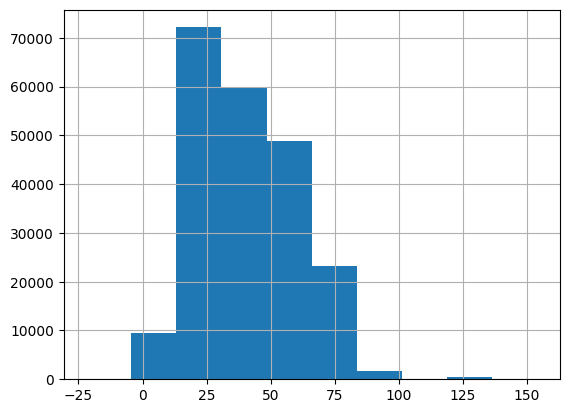

In [15]:
df.agedouble.hist()
print("Mean=",df.agedouble.mean())
print("Median=",df.agedouble.median())
print("Mode=",df.agedouble.mode())
print(df.agedouble.describe())

In [16]:
df.loc[df.agedouble < 0,'agedouble'] = 0
df.loc[df.agedouble > 100,'agedouble'] = 100

In [17]:
df2 = df.loc[df.agedouble < 10].loc[df.sex == 'ชาย']
df2

dead_year_be  dead_year_ad  agedouble  sex nationality_id  \
104             2554          2011        2.0  ชาย           99.0   
390             2554          2011        5.0  ชาย           99.0   
465             2554          2011        4.0  ชาย           99.0   
469             2554          2011        2.0  ชาย           99.0   
853             2554          2011        2.0  ชาย           99.0   
...              ...           ...        ...  ...            ...   
245211          2562          2019        7.0  ชาย           99.0   
245341          2562          2019        2.0  ชาย           99.0   
245368          2562          2019        3.0  ชาย           99.0   
245439          2562          2019        7.0  ชาย           99.0   
245454          2562          2019        5.0  ชาย           99.0   

             tumbol        district province  risk_helmet  dead_date_final  \
104     หนองค้างพลู         หนองแขม       กท          NaN              NaN   
390           ลำทับ           ลำทับ       กบ          NaN              NaN   
465          นครชุม  เมืองกำแพงเพชร       กพ          NaN              NaN   
469          วังแขม        คลองขลุง       กพ          NaN              NaN   
853          ซากไทย      เขาคิชฌกูฎ       จบ          NaN              NaN   
...             ...             ...      ...          ...              ...   
245211          NaN             NaN      NaN          NaN              NaN   
245341          NaN             NaN      NaN          NaN              NaN   
245368          NaN             NaN      NaN          NaN              NaN   
245439          NaN             NaN      NaN          NaN              NaN   
245454          NaN             NaN      NaN          NaN              NaN   

                   date_rec       time_recdouble         acc_sub_dist  \
104     2554-07-12 00:00:00  2554-07-12 00:00:00  1900-01-01 02:00:00   
390     2554-04-10 00:00:00  2554-04-07 00:00:00   1.7083333333333335   
465     2554-05-22 00:00:00  2554-05-22 00:00:00   1.7916666666666665   
469     2554-08-05 00:00:00  2554-04-18 00:00:00   1.3472222222222223   
853     2554-09-01 00:00:00  2554-08-31 00:00:00   1.8333333333333335   
...                     ...                  ...                  ...   
245211  2562-09-28 00:00:00                  NaN                  NaN   
245341  2562-07-20 00:00:00                  NaN                  NaN   
245368  2562-08-06 00:00:00                  NaN                  NaN   
245439  2562-06-09 00:00:00                  NaN                  NaN   
245454  2562-02-27 00:00:00                  NaN                  NaN   

       acc_dist   dead_province   acc_latlong    acclong     ncause  \
104     ทุ่งคอก      สองพี่น้อง    สุพรรณบุรี  14.169492  99.961769   
390       ลำทับ           ลำทับ        กระบี่   8.071914  99.287635   
465      นครชุม  เมืองกำแพงเพชร     กำแพงเพชร        NaN        NaN   
469      วังแขม        คลองขลุง     กำแพงเพชร        NaN        NaN   
853      ซากไทย      เขาคิชฌกูฎ      จันทบุรี        NaN        NaN   
...         ...             ...           ...        ...        ...   
245211      NaN             NaN  สุราษฎร์ธานี        NaN        NaN   
245341      NaN             NaN    นครราชสีมา        NaN        NaN   
245368      NaN             NaN      ศรีสะเกษ        NaN        NaN   
245439      NaN             NaN        สกลนคร        NaN        NaN   
245454      NaN             NaN     เชียงใหม่        NaN        NaN   

       vehicle_merge_final  
104                   V892  
390                   V596  
465                   V499  
469                   V299  
853                   V021  
...                    ...  
245211                V892  
245341                V892  
245368                V892  
245439                V892  
245454                V892  

[3598 rows x 19 columns]

In [18]:
df.loc[df.agedouble > 100].loc[df.district == 'ลาดยาว']

Empty DataFrame
Columns: [dead_year_be, dead_year_ad, agedouble, sex, nationality_id, tumbol, district, province, risk_helmet, dead_date_final, date_rec, time_recdouble, acc_sub_dist, acc_dist, dead_province, acc_latlong, acclong, ncause, vehicle_merge_final]
Index: []

In [19]:
df.agedouble.fillna(19, inplace = True) 
df.agedouble.replace({'-25':0}, inplace = True)

<Axes: >

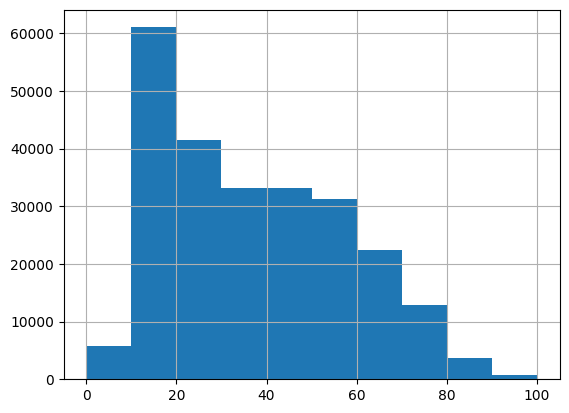

In [20]:
df.agedouble.hist()

## Nationality_id

In [21]:
df['nationality_id'].value_counts()

nationality_id
99.0              117306
Thai                7946
99.0                5074
99                  3781
Burmese              179
                   ...  
Bermudan               1
Irish Irishman         1
Filipino               1
Kazakhstani            1
44.0                   1
Name: count, Length: 77, dtype: int64

In [22]:
def replaceX(x):
    if x == '99' or x == '99.0' or x == 99 or x == '44.0' or x == 198.0:
        return "Unknown"
    else:
        return x

In [23]:
df['nationality_id'].apply(replaceX).value_counts()

nationality_id
Unknown                  126184
Thai                       7946
Burmese                     179
Cambodian                    30
Lao Laotian                  21
                          ...  
Iranian                       1
Danish Dane                   1
Lithuanian                    1
Bosnian Herzegovinian         1
Kazakhstani                   1
Name: count, Length: 73, dtype: int64

In [24]:
df['nationality_id'].fillna('Unknown', inplace = True)
df

dead_year_be  dead_year_ad  agedouble   sex nationality_id tumbol  \
0               2554          2011       19.0  หญิง        Unknown    NaN   
1               2554          2011       19.0  หญิง        Unknown    NaN   
2               2554          2011       19.0  หญิง        Unknown    NaN   
3               2554          2011       19.0  หญิง        Unknown    NaN   
4               2554          2011       30.0   ชาย           99.0    NaN   
...              ...           ...        ...   ...            ...    ...   
245474          2562          2019       46.0   ชาย           99.0    NaN   
245475          2562          2019       60.0   ชาย           99.0    NaN   
245476          2562          2019       63.0   ชาย           99.0    NaN   
245477          2562          2019       66.0   ชาย           99.0    NaN   
245478          2562          2019       14.0   ชาย           99.0    NaN   

       district province  risk_helmet  dead_date_final             date_rec  \
0           NaN       ec          NaN              NaN  2554-04-08 00:00:00   
1           NaN       ec          NaN              NaN  2554-03-14 00:00:00   
2           NaN       ec          NaN              NaN  2554-03-14 00:00:00   
3           NaN       ec          NaN              NaN  2554-03-14 00:00:00   
4           NaN       ec          NaN              NaN  2554-07-29 00:00:00   
...         ...      ...          ...              ...                  ...   
245474      NaN      NaN          NaN              NaN  2562-07-05 00:00:00   
245475      NaN      NaN          NaN              NaN  2562-02-25 00:00:00   
245476      NaN      NaN          NaN              NaN  2562-09-03 00:00:00   
245477      NaN      NaN          NaN              NaN  2562-09-30 00:00:00   
245478      NaN      NaN          NaN              NaN  2562-04-18 00:00:00   

             time_recdouble        acc_sub_dist      acc_dist   dead_province  \
0       2554-04-08 00:00:00                1.75       ลาดสวาย         ลำลูกกา   
1       2554-03-14 00:00:00  1.9583333333333335       แม่สรวย         แม่สรวย   
2       2554-03-14 00:00:00  1.9583333333333335       แม่สรวย         แม่สรวย   
3       2554-03-14 00:00:00  1.9583333333333335       แม่สรวย         แม่สรวย   
4       2554-07-29 00:00:00  1.0069444444444444  นครสวรรค์ออก  เมืองนครสวรรค์   
...                     ...                 ...           ...             ...   
245474                  NaN                 NaN           NaN             NaN   
245475                  NaN                 NaN           NaN             NaN   
245476                  NaN                 NaN           NaN             NaN   
245477                  NaN                 NaN           NaN             NaN   
245478                  NaN                 NaN           NaN             NaN   

       acc_latlong    acclong      ncause vehicle_merge_final  
0         ปทุมธานี  13.934314  100.688985                 NaN  
1         เชียงราย        NaN         NaN                 NaN  
2         เชียงราย        NaN         NaN                 NaN  
3         เชียงราย        NaN         NaN                 NaN  
4        นครสวรรค์        NaN         NaN                V289  
...            ...        ...         ...                 ...  
245474       ลำปาง        NaN         NaN                V892  
245475       ลำปาง        NaN         NaN                V892  
245476       ลำปาง        NaN         NaN                V892  
245477   อุตรดิตถ์        NaN         NaN                V892  
245478   อุตรดิตถ์        NaN         NaN                V892  

[245479 rows x 19 columns]

In [25]:
df.risk_helmet.isnull().value_counts()

risk_helmet
True     241089
False      4390
Name: count, dtype: int64

In [26]:
df.risk_helmet.value_counts()

risk_helmet
2.0    3048
1.0    1121
3.0     221
Name: count, dtype: int64

In [27]:
df.risk_helmet.fillna(0,inplace=True)

In [28]:
df.dead_date_final.isnull().value_counts()

dead_date_final
True     243413
False      2066
Name: count, dtype: int64

In [29]:
df.dead_date_final.value_counts()

dead_date_final
2.0    1363
3.0     625
1.0      78
Name: count, dtype: int64

In [30]:
df.dead_date_final.fillna(0,inplace=True)

In [31]:
df.ncause.value_counts()

ncause
0.000000      177
100.633111     55
100.652790     22
101.762223     16
101.200573     14
             ... 
101.508641      1
101.412254      1
101.662204      1
101.764335      1
101.883174      1
Name: count, Length: 104842, dtype: int64

In [32]:
df.vehicle_merge_final.value_counts()

vehicle_merge_final
V892    86004
V299    24920
Y349    14725
V499     7981
V234     7040
        ...  
V208        1
V100        1
V759        1
V693        1
V145        1
Name: count, Length: 367, dtype: int64

## Enrichment

In [33]:
def getHour(x):
    x = str(x)
    arr = x.split(" ")
    if len(arr) == 2:
        r = int(arr[1].split(":")[0])
    else:
        r = 0
    return r

In [34]:
df.time_recdouble.apply(getHour).value_counts()

time_recdouble
0    245479
Name: count, dtype: int64

In [35]:
df.to_csv("all.csv",index=False) 

In [36]:
df

dead_year_be  dead_year_ad  agedouble   sex nationality_id tumbol  \
0               2554          2011       19.0  หญิง        Unknown    NaN   
1               2554          2011       19.0  หญิง        Unknown    NaN   
2               2554          2011       19.0  หญิง        Unknown    NaN   
3               2554          2011       19.0  หญิง        Unknown    NaN   
4               2554          2011       30.0   ชาย           99.0    NaN   
...              ...           ...        ...   ...            ...    ...   
245474          2562          2019       46.0   ชาย           99.0    NaN   
245475          2562          2019       60.0   ชาย           99.0    NaN   
245476          2562          2019       63.0   ชาย           99.0    NaN   
245477          2562          2019       66.0   ชาย           99.0    NaN   
245478          2562          2019       14.0   ชาย           99.0    NaN   

       district province  risk_helmet  dead_date_final             date_rec  \
0           NaN       ec          0.0              0.0  2554-04-08 00:00:00   
1           NaN       ec          0.0              0.0  2554-03-14 00:00:00   
2           NaN       ec          0.0              0.0  2554-03-14 00:00:00   
3           NaN       ec          0.0              0.0  2554-03-14 00:00:00   
4           NaN       ec          0.0              0.0  2554-07-29 00:00:00   
...         ...      ...          ...              ...                  ...   
245474      NaN      NaN          0.0              0.0  2562-07-05 00:00:00   
245475      NaN      NaN          0.0              0.0  2562-02-25 00:00:00   
245476      NaN      NaN          0.0              0.0  2562-09-03 00:00:00   
245477      NaN      NaN          0.0              0.0  2562-09-30 00:00:00   
245478      NaN      NaN          0.0              0.0  2562-04-18 00:00:00   

             time_recdouble        acc_sub_dist      acc_dist   dead_province  \
0       2554-04-08 00:00:00                1.75       ลาดสวาย         ลำลูกกา   
1       2554-03-14 00:00:00  1.9583333333333335       แม่สรวย         แม่สรวย   
2       2554-03-14 00:00:00  1.9583333333333335       แม่สรวย         แม่สรวย   
3       2554-03-14 00:00:00  1.9583333333333335       แม่สรวย         แม่สรวย   
4       2554-07-29 00:00:00  1.0069444444444444  นครสวรรค์ออก  เมืองนครสวรรค์   
...                     ...                 ...           ...             ...   
245474                  NaN                 NaN           NaN             NaN   
245475                  NaN                 NaN           NaN             NaN   
245476                  NaN                 NaN           NaN             NaN   
245477                  NaN                 NaN           NaN             NaN   
245478                  NaN                 NaN           NaN             NaN   

       acc_latlong    acclong      ncause vehicle_merge_final  
0         ปทุมธานี  13.934314  100.688985                 NaN  
1         เชียงราย        NaN         NaN                 NaN  
2         เชียงราย        NaN         NaN                 NaN  
3         เชียงราย        NaN         NaN                 NaN  
4        นครสวรรค์        NaN         NaN                V289  
...            ...        ...         ...                 ...  
245474       ลำปาง        NaN         NaN                V892  
245475       ลำปาง        NaN         NaN                V892  
245476       ลำปาง        NaN         NaN                V892  
245477   อุตรดิตถ์        NaN         NaN                V892  
245478   อุตรดิตถ์        NaN         NaN                V892  

[245479 rows x 19 columns]

In [37]:
#!hdfs dfs -rm -f /user/hive/warehouse/default/chakritp_lab2/*/*.csv

# Prep File

In [38]:
d = df.dead_year_ad.value_counts()

In [39]:
!mkdir ./prep/

mkdir: cannot create directory ‘./prep/’: File exists


In [40]:
for i in d.index:
    df[df.dead_year_ad == i].to_csv("./prep/"+str(i)+"_prep.csv")
d

dead_year_ad
2012    21857
2016    21669
2017    21592
2013    21158
2014    21035
2018    20419
2019    20015
2015    19733
2020    17744
2021    17573
2022    17347
2011    16213
2023     9124
Name: count, dtype: int64

In [41]:
!ls -la ./prep/

total 40660
drwxr-xr-x 2 root root    4096 Sep 23 14:36 .
drwxr-xr-x 4 root root    4096 Oct  1 20:07 ..
-rw-r--r-- 1 root root 2761435 Oct  1 20:07 2011_prep.csv
-rw-r--r-- 1 root root 3835546 Oct  1 20:07 2012_prep.csv
-rw-r--r-- 1 root root 3667659 Oct  1 20:07 2013_prep.csv
-rw-r--r-- 1 root root 3638647 Oct  1 20:07 2014_prep.csv
-rw-r--r-- 1 root root 3282031 Oct  1 20:07 2015_prep.csv
-rw-r--r-- 1 root root 3573300 Oct  1 20:07 2016_prep.csv
-rw-r--r-- 1 root root 3369004 Oct  1 20:07 2017_prep.csv
-rw-r--r-- 1 root root 3200637 Oct  1 20:07 2018_prep.csv
-rw-r--r-- 1 root root 3567249 Oct  1 20:07 2019_prep.csv
-rw-r--r-- 1 root root 3252340 Oct  1 20:07 2020_prep.csv
-rw-r--r-- 1 root root 3232587 Oct  1 20:07 2021_prep.csv
-rw-r--r-- 1 root root 2804489 Oct  1 20:07 2022_prep.csv
-rw-r--r-- 1 root root 1410812 Oct  1 20:07 2023_prep.csv


# Create table hive (Lab2)

In [42]:
import os

In [43]:
os.environ["USER_NAME"] = "Tanawin"

In [44]:
#สร้าง Schemas ด้วยชื่อของนักศึกษาและเก็บไว้ที่ตัวแปร MY_HIVE_SCHEMA2 
#คำสั่งในการสร้างคล้ายเดิมแต่เพิ่ม Partition

os.environ["MY_HIVE_SCHEMA2"] =  '''"CREATE EXTERNAL TABLE  default.##USER_NAME##_lab2 ( 
id_dontcare INT,
dead_conso_id INT,
dead_year_be INT,
dead_year_ad int,
age DOUBLE,
sex STRING,
nationality_id STRING,
tumbol STRING,
district STRING,
province STRING,
risk_helmet STRING,
dead_date_final STRING,
date_rec STRING,
time_rec DOUBLE,
acc_sub_dist STRING,
acc_dist STRING,
dead_province STRING,
acc_latlong STRING,
acclong STRING,
ncause STRING,
vehicle_merge_final STRING
) 
PARTITIONED BY (year int)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES ('field.delim'=',','serialization.format'=',') 
STORED AS INPUTFORMAT  'org.apache.hadoop.mapred.TextInputFormat' 
OUTPUTFORMAT 'org.apache.hadoop.hive.ql.io.HiveIgnoreKeyTextOutputFormat'  
LOCATION '/user/hive/warehouse/default/##USER_NAME##_lab2' 
TBLPROPERTIES ('skip.header.line.count'='1');"'''.replace("\n"," ").replace("##USER_NAME##",os.environ["USER_NAME"])
os.environ["MY_HIVE_SCHEMA2"]

'"CREATE EXTERNAL TABLE  default.Tanawin_lab2 (  id_dontcare INT, dead_conso_id INT, dead_year_be INT, dead_year_ad int, age DOUBLE, sex STRING, nationality_id STRING, tumbol STRING, district STRING, province STRING, risk_helmet STRING, dead_date_final STRING, date_rec STRING, time_rec DOUBLE, acc_sub_dist STRING, acc_dist STRING, dead_province STRING, acc_latlong STRING, acclong STRING, ncause STRING, vehicle_merge_final STRING )  PARTITIONED BY (year int) ROW FORMAT SERDE \'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe\' WITH SERDEPROPERTIES (\'field.delim\'=\',\',\'serialization.format\'=\',\')  STORED AS INPUTFORMAT  \'org.apache.hadoop.mapred.TextInputFormat\'  OUTPUTFORMAT \'org.apache.hadoop.hive.ql.io.HiveIgnoreKeyTextOutputFormat\'   LOCATION \'/user/hive/warehouse/default/Tanawin_lab2\'  TBLPROPERTIES (\'skip.header.line.count\'=\'1\');"'

In [45]:
#ทำการ สร้าง schema table ด้วยคำสั่ง hive
!hive -e "${MY_HIVE_SCHEMA2}"

which: no hbase in (/home/miniconda3/bin:/home/miniconda3/condabin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/home/hive/bin:/home/derby/bin:/home/hadoop/bin:/home/hive/bin:/root/bin)
SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/home/apache-hive-3.1.3-bin/lib/log4j-slf4j-impl-2.17.1.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/home/hadoop-3.3.6/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = 78a9d876-0d7c-4844-8f87-3eb65fe27e28

Logging initialized using configuration in jar:file:/home/apache-hive-3.1.3-bin/lib/hive-common-3.1.3.jar!/hive-log4j2.properties Async: true
Exception in thread "main" java.lang.RuntimeException: java.net.ConnectException: Call From iZ0jo5jaj60t7wybz580moZ/17

In [50]:
!hdfs dfs -ls /user/hive/warehouse/default/Tanawin_lab2/

ls: Call From iZ0jo5jaj60t7wybz580moZ/172.25.235.221 to nn1.budata.ai:9000 failed on connection exception: java.net.ConnectException: Connection refused; For more details see:  http://wiki.apache.org/hadoop/ConnectionRefused


In [52]:
#ls เพื่อตรวจสอบว่า Folder [ชื่อ]_lab2 ถูกสร้างโดยอัตโนมัตื
!hdfs dfs -ls /user/hive/warehouse/default/Tanawin_lab2

ls: Call From iZ0jo5jaj60t7wybz580moZ/172.25.235.221 to nn1.budata.ai:9000 failed on connection exception: java.net.ConnectException: Connection refused; For more details see:  http://wiki.apache.org/hadoop/ConnectionRefused


In [53]:
#ทำการ Upload data 2011.csv โดยใช้ hive command ด้วยคำสั่ง Load
!hive -e "LOAD DATA LOCAL INPATH '/home/notebooks/$USER_NAME/prep/2011_prep.csv' OVERWRITE INTO TABLE ${USER_NAME}_lab2 PARTITION (year=2011);"

which: no hbase in (/home/miniconda3/bin:/home/miniconda3/condabin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/home/hive/bin:/home/derby/bin:/home/hadoop/bin:/home/hive/bin:/root/bin)
SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/home/apache-hive-3.1.3-bin/lib/log4j-slf4j-impl-2.17.1.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/home/hadoop-3.3.6/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = f0687446-6245-4835-bfa6-c3d622b88b7f

Logging initialized using configuration in jar:file:/home/apache-hive-3.1.3-bin/lib/hive-common-3.1.3.jar!/hive-log4j2.properties Async: true
Exception in thread "main" java.lang.RuntimeException: java.net.ConnectException: Call From iZ0jo5jaj60t7wybz580moZ/17

In [54]:
#ls เพื่อตรวจสอบว่า Folder [ชื่อ]_lab2 ถูกสร้างโดยอัตโนมัตื
!hdfs dfs -ls /user/hive/warehouse/default/${USER_NAME}_lab2

ls: Call From iZ0jo5jaj60t7wybz580moZ/172.25.235.221 to nn1.budata.ai:9000 failed on connection exception: java.net.ConnectException: Connection refused; For more details see:  http://wiki.apache.org/hadoop/ConnectionRefused


In [55]:
#Query เพื่อนับจำนวนทั้งหมด
!hive -e "select count(*) from ${USER_NAME}_lab2 limit 10"

which: no hbase in (/home/miniconda3/bin:/home/miniconda3/condabin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/home/hive/bin:/home/derby/bin:/home/hadoop/bin:/home/hive/bin:/root/bin)
SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/home/apache-hive-3.1.3-bin/lib/log4j-slf4j-impl-2.17.1.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/home/hadoop-3.3.6/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = e7dc1365-d7a3-48d7-9f1a-53e89ea0c49c

Logging initialized using configuration in jar:file:/home/apache-hive-3.1.3-bin/lib/hive-common-3.1.3.jar!/hive-log4j2.properties Async: true
Exception in thread "main" java.lang.RuntimeException: java.net.ConnectException: Call From iZ0jo5jaj60t7wybz580moZ/17

In [56]:
#ลบข้อมูลทั้งหมดออกจาก Table
!hdfs dfs -rm /user/hive/warehouse/default/${USER_NAME}_lab2/*/*.csv

rm: Call From iZ0jo5jaj60t7wybz580moZ/172.25.235.221 to nn1.budata.ai:9000 failed on connection exception: java.net.ConnectException: Connection refused; For more details see:  http://wiki.apache.org/hadoop/ConnectionRefused


# Load all csv file into table

In [ ]:
for i in os.listdir("./prep"):
    year,dc = i.split("_")
    #print(year,i)
    cmd = "hive -e \"LOAD DATA LOCAL INPATH '/home/notebooks/${USER_NAME}/prep/"+i+"' OVERWRITE INTO TABLE ${USER_NAME}_lab2 PARTITION (year="+year+");\""
    print(cmd)
    os.system(cmd)

hive -e "LOAD DATA LOCAL INPATH '/home/notebooks/${USER_NAME}/prep/2022_prep.csv' OVERWRITE INTO TABLE ${USER_NAME}_lab2 PARTITION (year=2022);"


which: no hbase in (/home/miniconda3/bin:/home/miniconda3/condabin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/home/hive/bin:/home/derby/bin:/home/hadoop/bin:/home/hive/bin:/root/bin)
SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/home/apache-hive-3.1.3-bin/lib/log4j-slf4j-impl-2.17.1.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/home/hadoop-3.3.6/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = 4c87f905-87d8-4dd6-989f-d056bbd138cb

Logging initialized using configuration in jar:file:/home/apache-hive-3.1.3-bin/lib/hive-common-3.1.3.jar!/hive-log4j2.properties Async: true


In [ ]:
!hdfs dfs -ls /user/hive/warehouse/default/Tanawin_lab2/*/*

In [ ]:
!hive -e "select * from Tanawin_lab2 where year=2019 limit 10"

In [ ]:
#import pandas_profiling